In [1]:
from trainer import Trainer
import constants


import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


/local/users/unjde


In [2]:

embeddings = {}
text_labels = []
raw_text_labels_files = []

for file_path in constants.file_paths:
    with open(file_path + "_embeddings_.json", "r") as f:
        embeddings_objects = json.load(f)
        for emb_obj in embeddings_objects:
            embeddings[emb_obj["hash"]] = np.array(emb_obj["embeddings"])

    with open(file_path + "_labeled_fewer_classes.json", "r") as f:
        text_labels_file = json.load(f)
        raw_text_labels_files.append({'ds': file_path, 'raw': text_labels_file})
        for text_hash, doc_info in text_labels_file.items():
            labels_list = [label["system"] for label in doc_info["label"]]
            text_labels.append((text_hash, labels_list))



In [3]:
# Assuming your initial data processing steps
filtered_embeddings = []
filtered_text_labels = []
doc_values_initial = []
doc_values = []

for item in raw_text_labels_files:
    raw_data = item.get('raw', {})
    for key, value in raw_data.items():
        doc_value = value.get('doc')
        if doc_value:
            doc_values_initial.append(doc_value)

for i, (sample_id, classes) in enumerate(text_labels):
    if classes:
        for label in classes:
            filtered_embeddings.append(embeddings[sample_id])
            filtered_text_labels.append(label)
            doc_values.append(doc_values_initial[i])



In [4]:
print(len(doc_values))

6951


In [5]:
# # Assuming your initial data processing steps
# filtered_embeddings = []
# filtered_text_labels = []

# for sample_id, classes in text_labels:
#     if classes:
#         for label in classes:
#             filtered_embeddings.append(embeddings[sample_id])
#             filtered_text_labels.append(label)

# label_encoder = LabelEncoder()
# X = np.array(filtered_embeddings)
# y = label_encoder.fit_transform(filtered_text_labels)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
!pip install top2vec nltk

In [7]:
!pip install top2vec[sentence_encoders]

In [8]:
from top2vec import Top2Vec


2024-08-06 11:18:23.884591: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-06 11:18:23.899915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 11:18:23.917727: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 11:18:23.922650: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 11:18:23.935215: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
import nltk
nltk.download('stopwords')

def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    return text
def tok(text):
    import gensim
    text = gensim.utils.simple_preprocess(text)
    text = remove_stopwords(text)
    return text
topic_model = Top2Vec(
    doc_values,
    embedding_model="universal-sentence-encoder",
    speed="deep-learn",
    tokenizer=tok,
    ngram_vocab=True,
    ngram_vocab_args={"connector_words": "phrases.ENGLISH_CONNECTOR_WORDS"},
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /local/users/unjde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-07-31 11:06:54,487 - top2vec - INFO - Pre-processing documents for training
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-07-31 11:06:59,011 - top2vec - INFO - Downloading universal-sentence-encoder model
2024-07-31 11:06:59.230079: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22462 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1b:00.0, compute capability: 8.6
2024-07-31 11:06:59.230677: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22462 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3

In [9]:
model_path = 'model/topic2vec'

topic_model = Top2Vec.load(model_path)
topic_model.save(model_path)

In [10]:
topic_model.get_num_topics()

37

In [11]:
topic_words, word_scores, topic_nums = topic_model.get_topics(37)

In [12]:
topic_words[2]

array(['spokesman said', 'police spokesman', 'police chief', 'according',
       'told reporters', 'police said', 'office said', 'spokesman',
       'safety', 'said think', 'security chief', 'officials said', 'said',
       'company said', 'decision', 'spokeswoman said', 'said filed',
       'security officials', 'newspaper said', 'inc said', 'told reuters',
       'gov', 'said monday', 'maintenance', 'article protected',
       'told news', 'surgical management', 'regulation', 'said statement',
       'said company', 'corp said', 'agreement', 'security', 'said know',
       'management', 'secretary', 'another', 'official said',
       'xinhua news', 'rrb said', 'attorney general', 'supreme court',
       'operative management', 'luciferase reporter', 'quoted saying',
       'one case', 'secretary state', 'jeff wilson', 'policy',
       'regulatory'], dtype='<U27')

In [14]:
# topic_words, word_scores, topic_nums = topic_model.get_topics(37)
# for topic in topic_nums:
#     topic_model.generate_topic_wordcloud(topic)

In [15]:
document_topics, scores, words, topic_word_emb = topic_model.get_documents_topics(doc_ids=list(range(len(doc_values))))
assert len(doc_values) == len(document_topics)
print(doc_values[2383])
print(document_topics[2383])
print(words[2383])
print(scores[2383])



CRICKET - SRI LANKA BEAT AUSTRALIA BY FOUR WICKETS .  COLOMBO 1996-08-30  Sri Lanka beat Australia by four wickets in the third match of the Singer World Series one-day ( 50 overs ) cricket tournament on Friday .  Scores : Australia 228-9 in 50 overs , Sri Lanka 232-6 in 45.5 overs . 
1
['told reuters' 'stock market' 'traders said' 'trader said'
 'stock exchange' 'insider trading' 'securities exchange' 'dow jones'
 'reuters verified' 'brokers said' 'reuters' 'analysts said' 'traders'
 'earnings' 'securities' 'profit taking' 'expected rise' 'shares'
 'investors' 'stock' 'economic losses' 'common stock' 'goldman sachs'
 'quantitative structure' 'central bank' 'shares traded'
 'trading thursday' 'xinhua news' 'resulted lower' 'analysts' 'loss yen'
 'holding company' 'told news' 'wall street' 'quantitative analysis'
 'percent rise' 'million shares' 'bond market' 'us dollar' 'one trader'
 'preferred shares' 'loss mln' 'economic' 'earnings per' 'trading'
 'common shares' 'quantitative' 'subo

In [16]:
topic_model.word_vectors[topic_model.word_indexes['searched pubmed']]

array([ 6.37386460e-04,  2.43113153e-02,  5.22076972e-02, -2.42720600e-02,
       -7.46904165e-02, -4.64939550e-02,  4.08156998e-02, -3.20593230e-02,
        7.07654580e-02,  2.99914293e-02,  8.36167485e-02,  3.25061269e-02,
        4.34492715e-02,  7.49886259e-02, -2.12146528e-02, -1.05210189e-02,
       -9.12138522e-02,  3.44455970e-04,  5.66623695e-02, -6.79576844e-02,
       -8.06702450e-02,  1.01255877e-02, -4.47166674e-02,  6.84815496e-02,
        3.30226012e-02,  5.94569743e-02,  1.02855666e-02,  2.81878840e-02,
       -1.94824580e-02,  4.38535847e-02, -3.60790379e-02,  9.13784131e-02,
        4.82433252e-02, -6.45298362e-02, -6.08761609e-02, -6.33781254e-02,
       -8.31005499e-02, -5.66018280e-03, -2.64994949e-02,  1.31892702e-02,
       -4.87522110e-02,  1.10884011e-03, -3.65621559e-02, -5.00846002e-03,
        7.35711157e-02,  5.51315546e-02,  4.39103879e-02,  9.66638047e-03,
        2.85654585e-03,  1.90407634e-02, -8.63206685e-02,  6.10364452e-02,
        3.38242166e-02,  

In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
document_topics_one_hot = one_hot_encoder.fit_transform(np.reshape(document_topics, (-1,1)))

In [18]:
document_topics_one_hot

<6951x37 sparse matrix of type '<class 'numpy.float64'>'
	with 6951 stored elements in Compressed Sparse Row format>

In [19]:
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(document_topics_one_hot).toarray()

In [20]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(filtered_text_labels)

X_emb_only = np.array(filtered_embeddings)

X_topics = np.array(sparse_matrix)


X_combined_one_hot = np.hstack((X_topics, filtered_embeddings))


X_combined_top_word_emb = np.hstack((topic_word_emb, filtered_embeddings))



In [21]:

assert len(filtered_text_labels) == len(sparse_matrix)

In [22]:
def evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    trainer = Trainer()
    trainer.train(X_train, y_train)

    predictions = trainer.predict(X_test)


    class_names = label_encoder.classes_

    for name, preds in predictions.items():
        accuracy, f1, recall = trainer.evaluate(y_test, preds)
        print(f"{name} accuracy: {accuracy}, f1 score: {f1}, recall: {recall}")

    for name, preds in predictions.items():
        cm = confusion_matrix(y_test, preds)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()
    print(trainer.get_best_params())

----------------- evaluate: topics only ---------------------
Training dummy_mf...


Training dummy_pr...
Training dummy_st...
Training dummy_un...
Training random_forest...
Training svm...
Training knn...
Training mlp...
dummy_mf accuracy: 0.23537871524448706, f1 score: 0.08969417864574555, recall: 0.23537871524448706
dummy_pr accuracy: 0.23537871524448706, f1 score: 0.08969417864574555, recall: 0.23537871524448706
dummy_st accuracy: 0.17209971236816873, f1 score: 0.17414847439059686, recall: 0.17209971236816873
dummy_un accuracy: 0.13806327900287632, f1 score: 0.14941955123109918, recall: 0.13806327900287632
random_forest accuracy: 0.4204218600191755, f1 score: 0.3087483868266939, recall: 0.4204218600191755
svm accuracy: 0.4199424736337488, f1 score: 0.2766180841352921, recall: 0.4199424736337488
knn accuracy: 0.412751677852349, f1 score: 0.2884635973439487, recall: 0.412751677852349
mlp accuracy: 0.4189837008628955, f1 score: 0.3113054168121793, recall: 0.4189837008628955


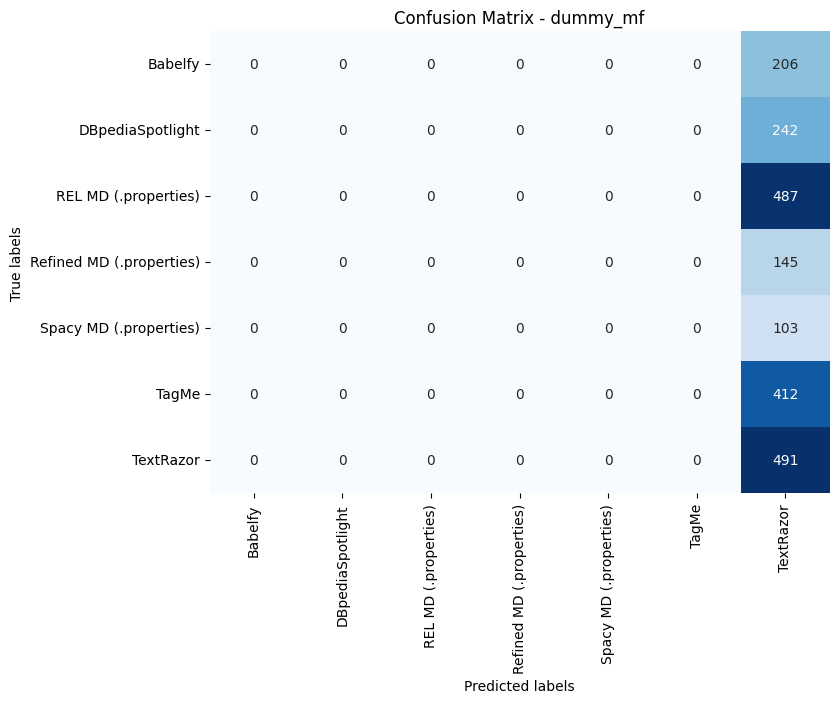

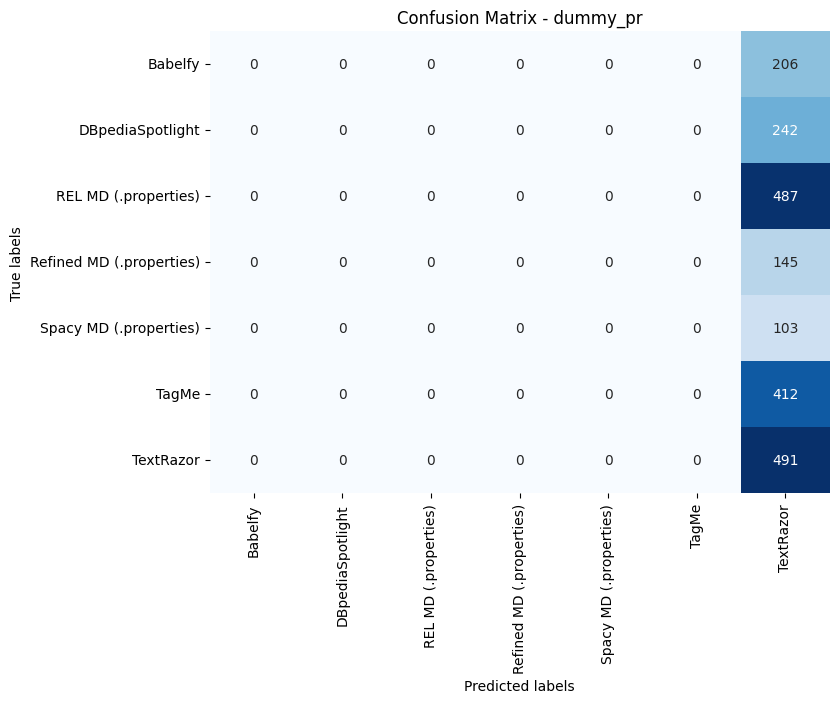

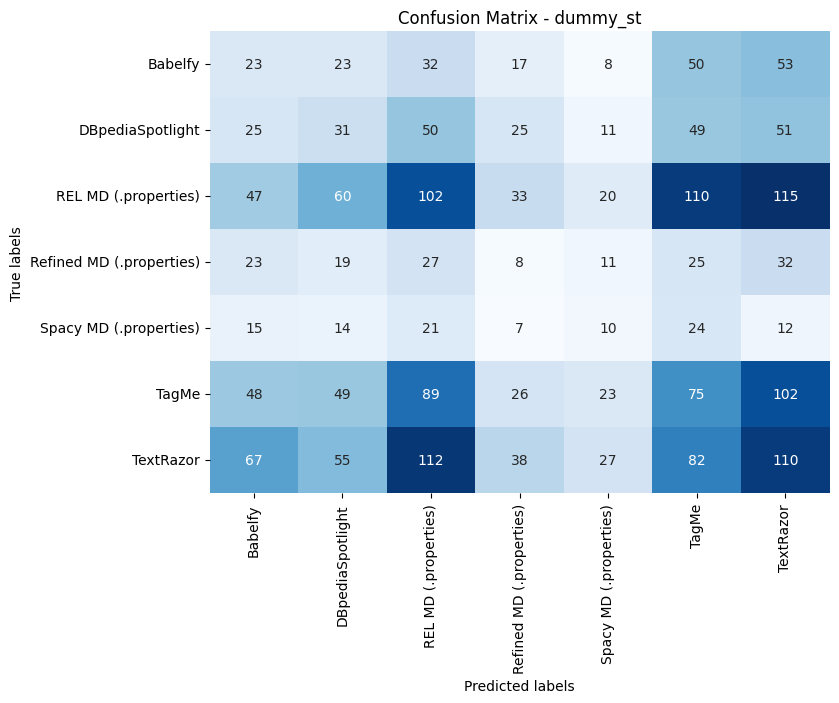

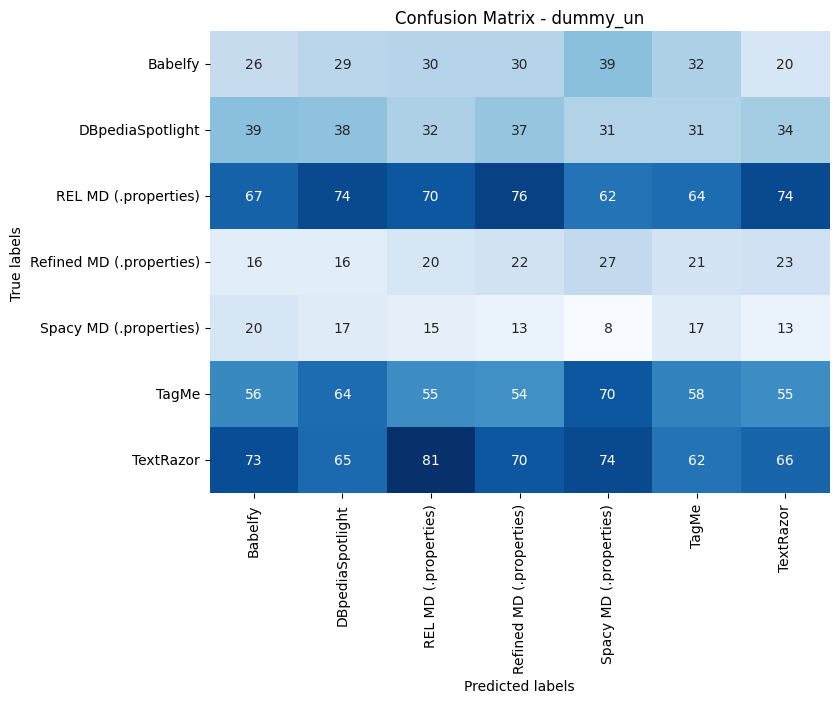

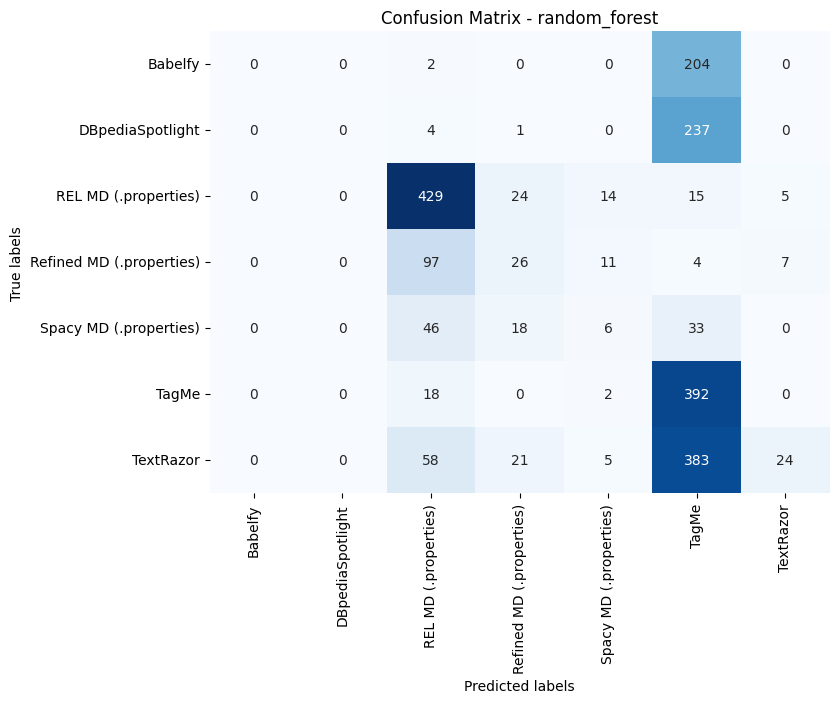

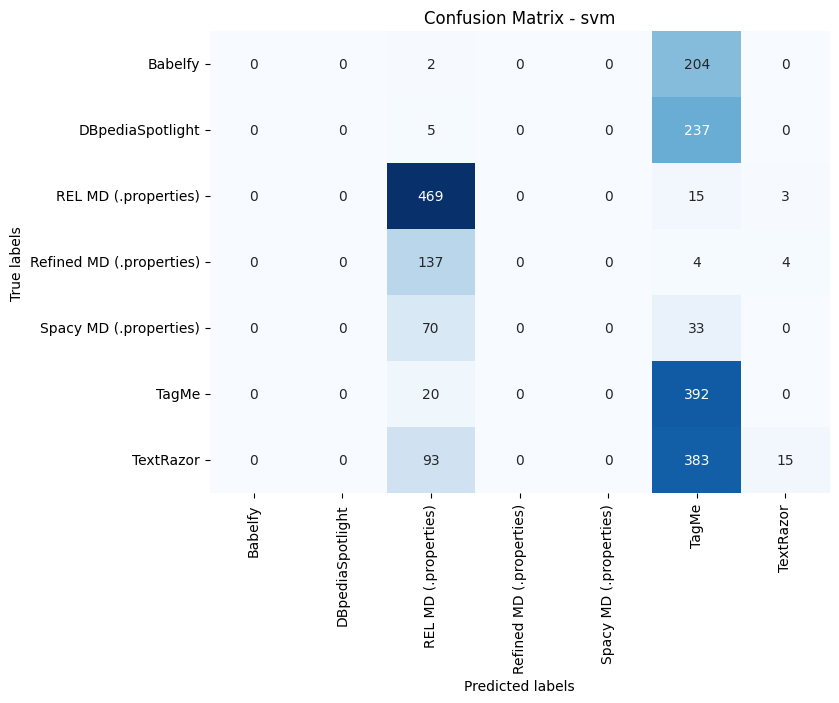

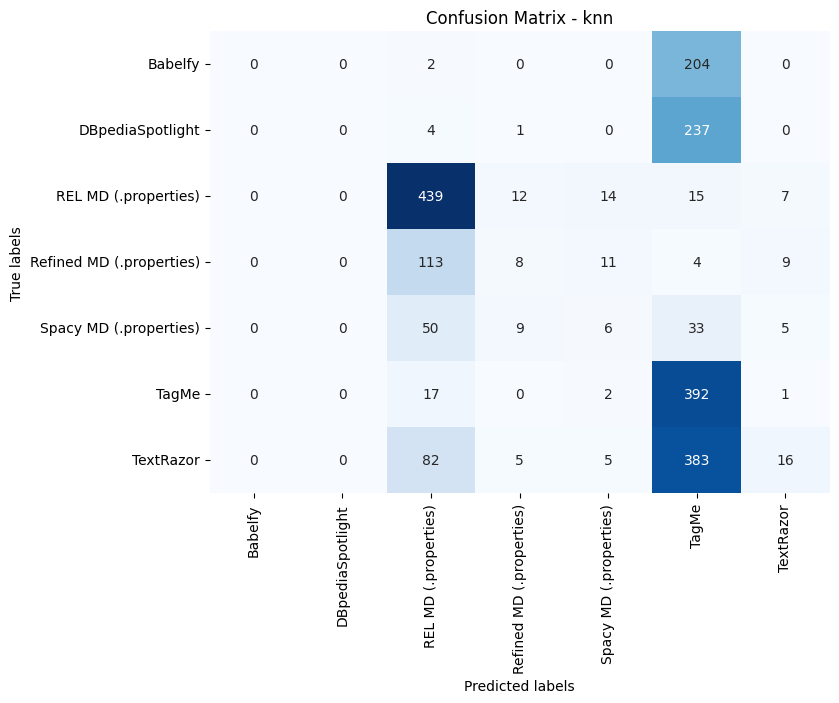

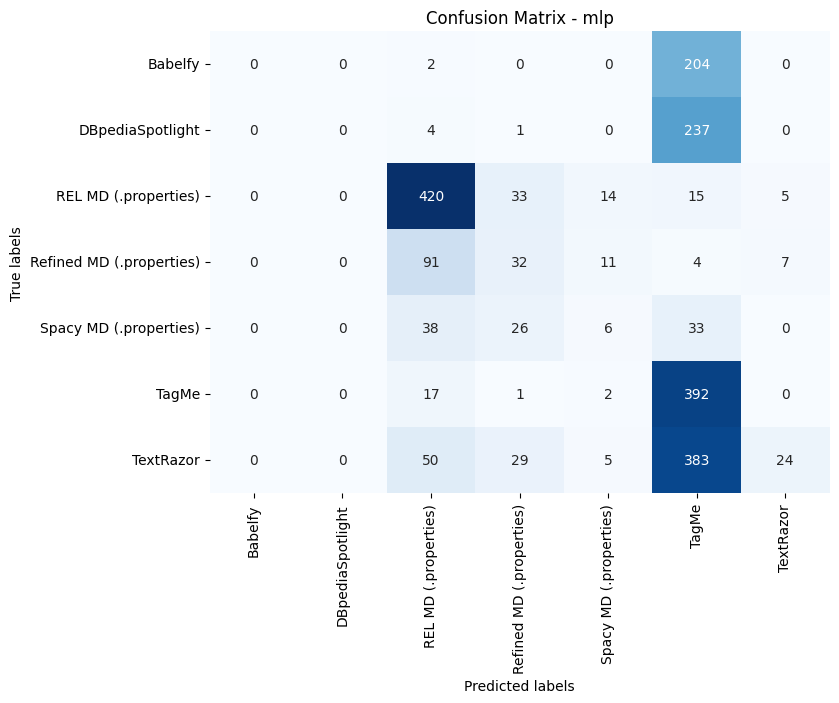

{'dummy_mf': {}, 'dummy_pr': {}, 'dummy_st': {}, 'dummy_un': {}, 'random_forest': {'max_depth': 30, 'n_estimators': 100}, 'svm': {'C': 0.1, 'kernel': 'linear'}, 'knn': {'n_neighbors': 7, 'p': 1}, 'mlp': {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}}
----------------- evaluate: word emb only ---------------------
Training dummy_mf...
Training dummy_pr...
Training dummy_st...
Training dummy_un...
Training random_forest...
Training svm...
Training knn...
Training mlp...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
 

dummy_mf accuracy: 0.23537871524448706, f1 score: 0.08969417864574555, recall: 0.23537871524448706
dummy_pr accuracy: 0.23537871524448706, f1 score: 0.08969417864574555, recall: 0.23537871524448706
dummy_st accuracy: 0.188398849472675, f1 score: 0.18825899026681484, recall: 0.188398849472675
dummy_un accuracy: 0.14525407478427613, f1 score: 0.1555564016089415, recall: 0.14525407478427613
random_forest accuracy: 0.4621284755512943, f1 score: 0.4218101377642844, recall: 0.4621284755512943
svm accuracy: 0.48801534036433364, f1 score: 0.4278084416206568, recall: 0.48801534036433364
knn accuracy: 0.4419942473633749, f1 score: 0.42771127131750153, recall: 0.4419942473633749
mlp accuracy: 0.4721955896452541, f1 score: 0.4616942500791548, recall: 0.4721955896452541


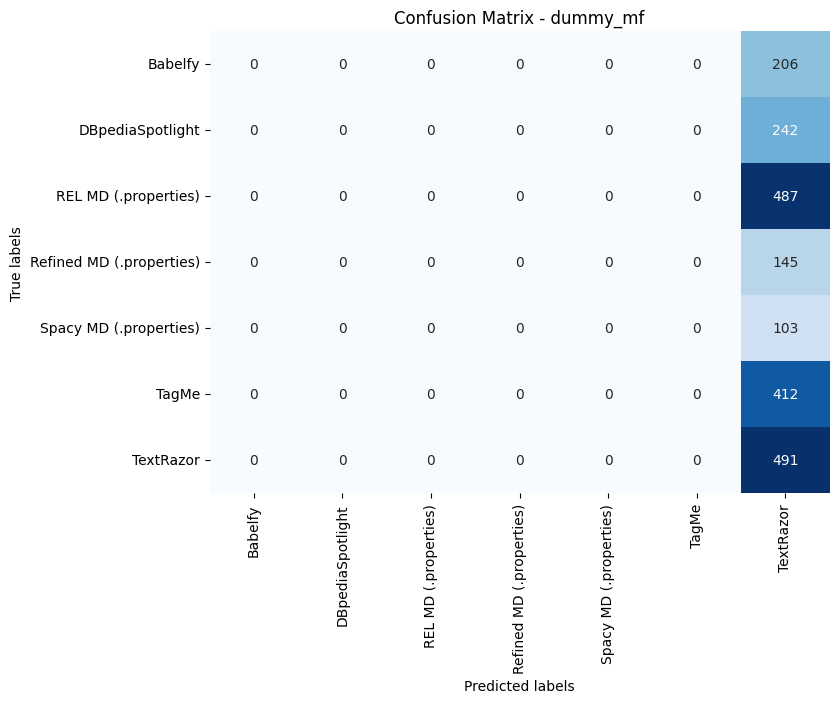

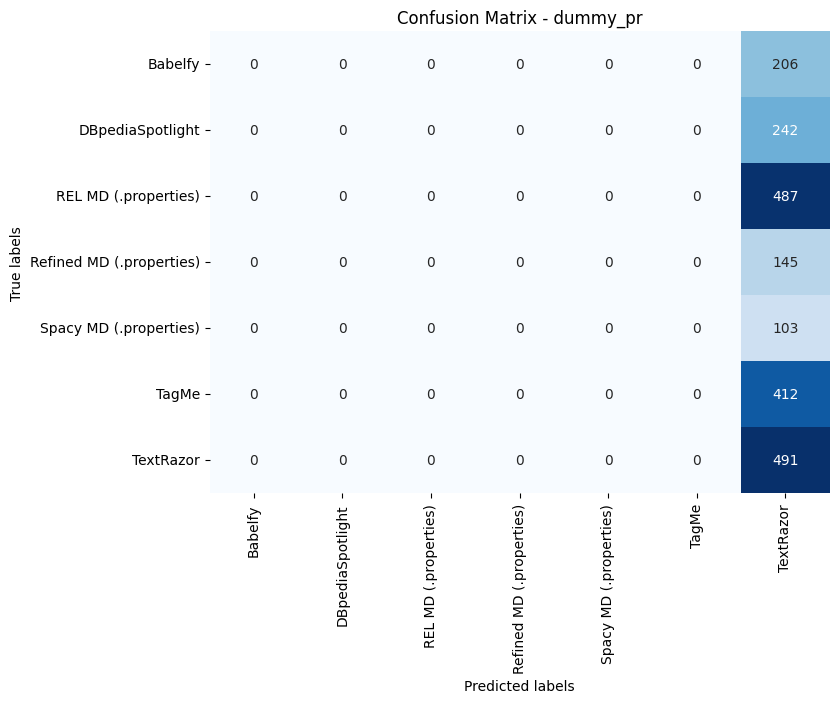

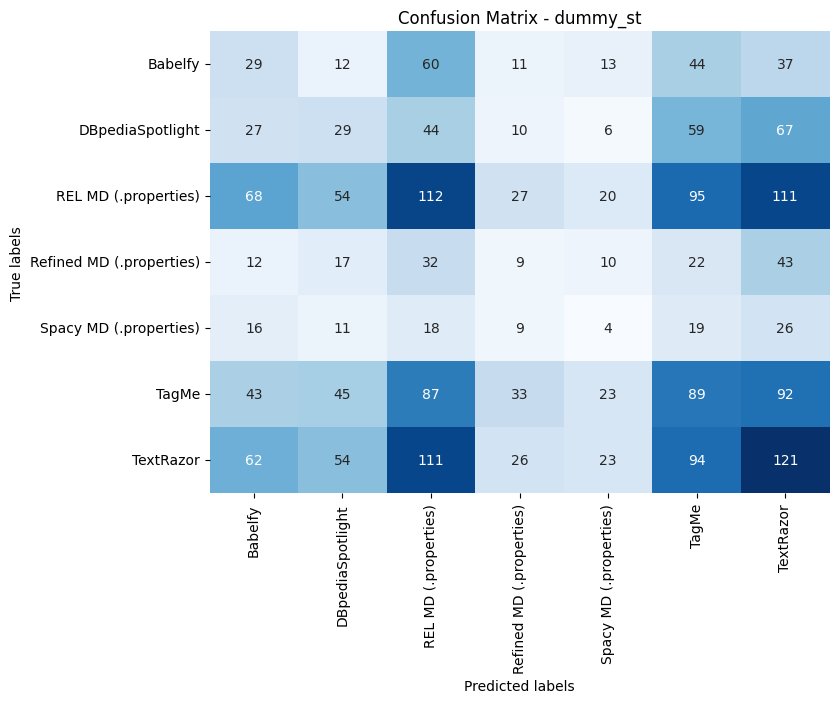

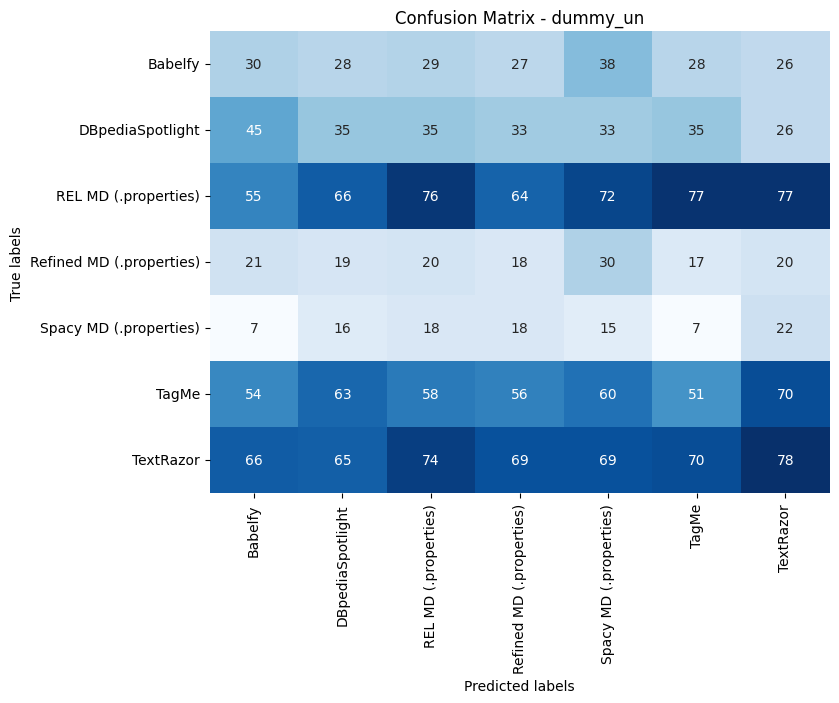

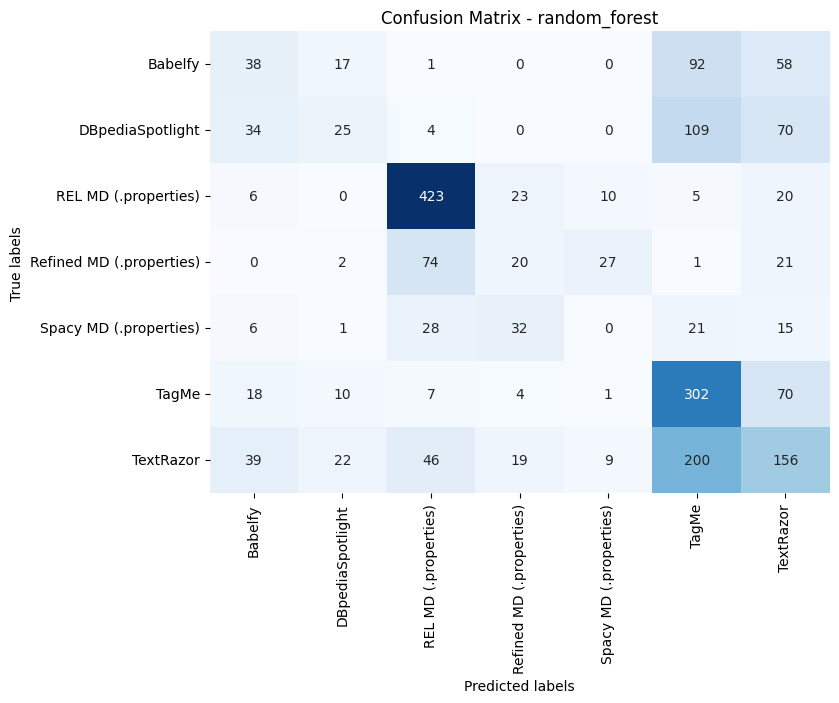

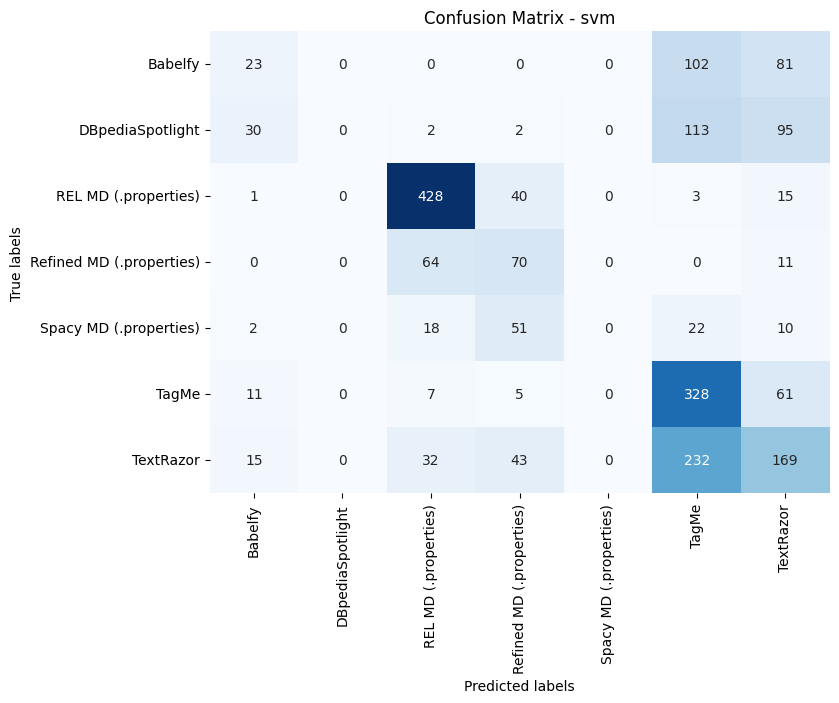

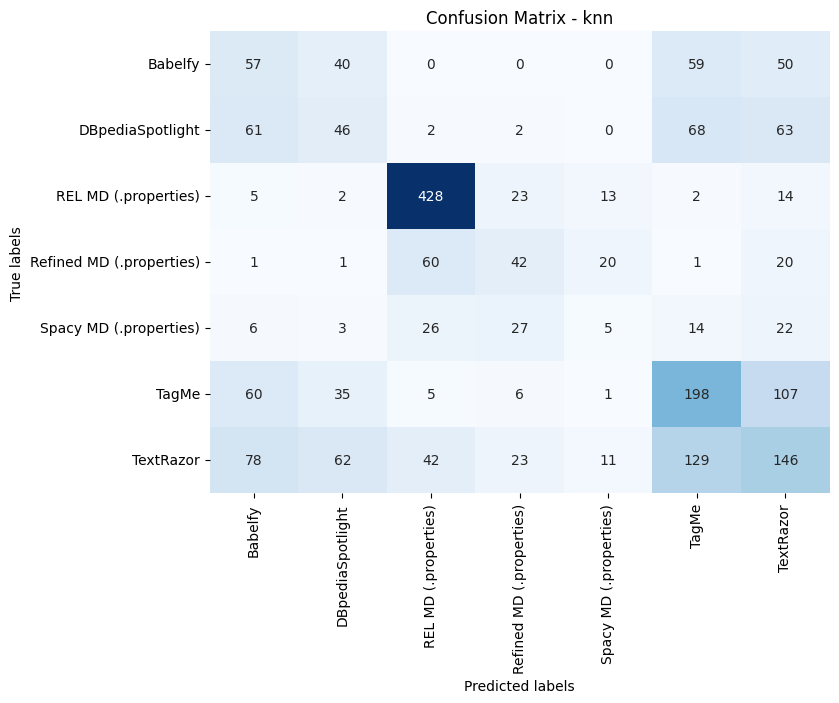

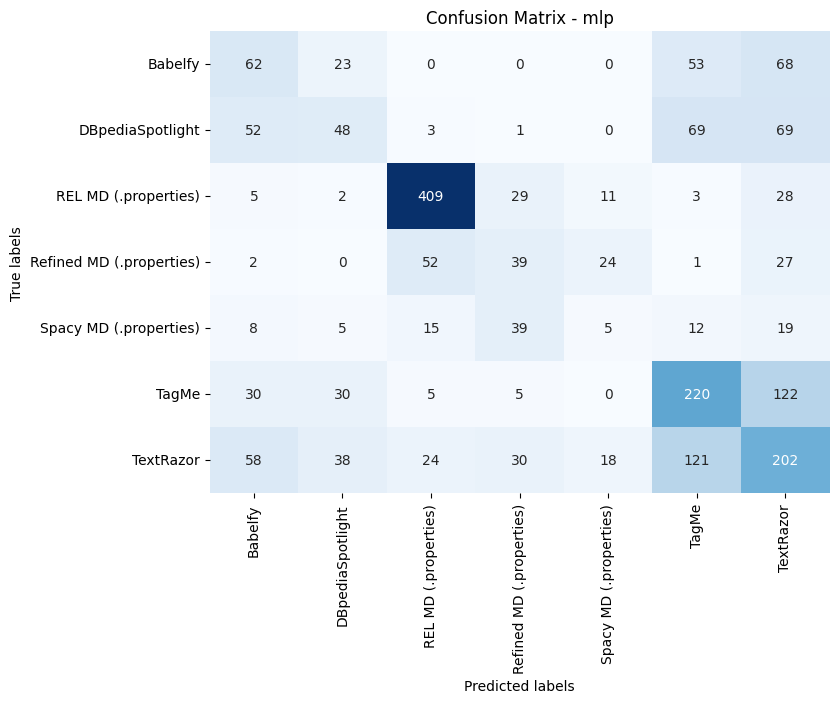

{'dummy_mf': {}, 'dummy_pr': {}, 'dummy_st': {}, 'dummy_un': {}, 'random_forest': {'max_depth': 30, 'n_estimators': 200}, 'svm': {'C': 1, 'kernel': 'rbf'}, 'knn': {'n_neighbors': 7, 'p': 2}, 'mlp': {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}}


In [23]:
print("----------------- evaluate: topics only ---------------------")
evaluate(X_topics, y)
print("----------------- evaluate: word emb only ---------------------")
evaluate(X_emb_only, y)


In [43]:
print(X_combined_one_hot[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.89658257e-02 -3.14877667e-02  8.59757140e-03
  1.79671615e-01  2.85517573e-01  1.03789873e-01  4.09450345e-02
 -2.51768455e-02  1.73146829e-01 -5.14787734e-01 -2.27844045e-02
  4.99972403e-01 -1.47493750e-01  1.58766046e-01 -1.00518517e-01
  1.42774377e-02 -1.69766452e-02  3.06260765e-01 -1.29668236e-01
 -1.42970294e-01  4.29042391e-02 -1.73133314e-01  2.28526369e-02
  2.90551875e-02  1.56908

----------------- evaluate: combined one one encoding (noisy) ---------------------
Training random_forest...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Training svm...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Training knn...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Training mlp...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/users/unjde/anal

random_forest accuracy: 0.4444444444444444, f1 score: 0.39007749807596287, recall: 0.4444444444444444
svm accuracy: 0.47353361945636624, f1 score: 0.4050676207282451, recall: 0.47353361945636624
knn accuracy: 0.42250834525512637, f1 score: 0.40694586061297183, recall: 0.42250834525512637
mlp accuracy: 0.4492131616595136, f1 score: 0.4262246617054555, recall: 0.4492131616595136


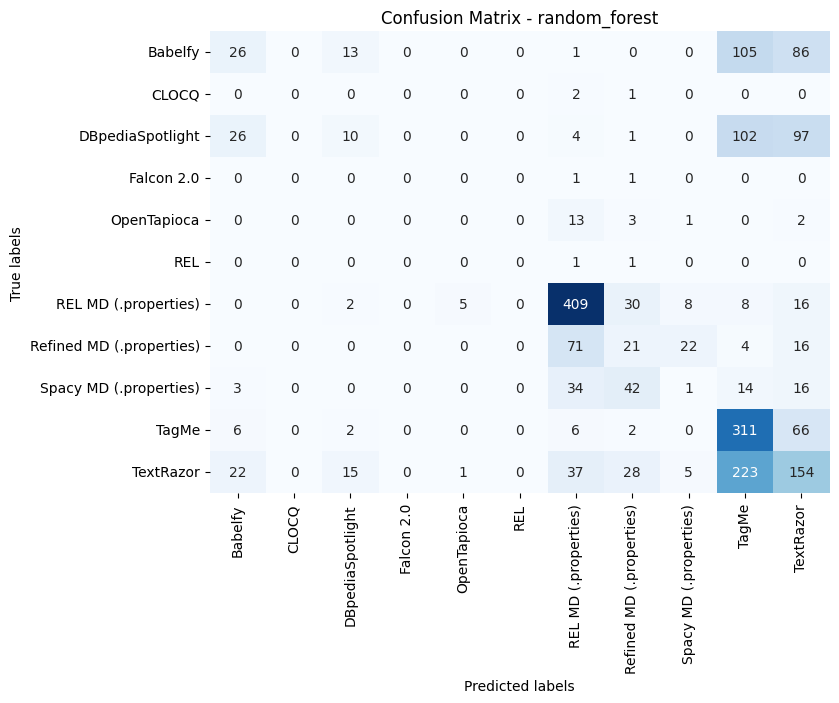

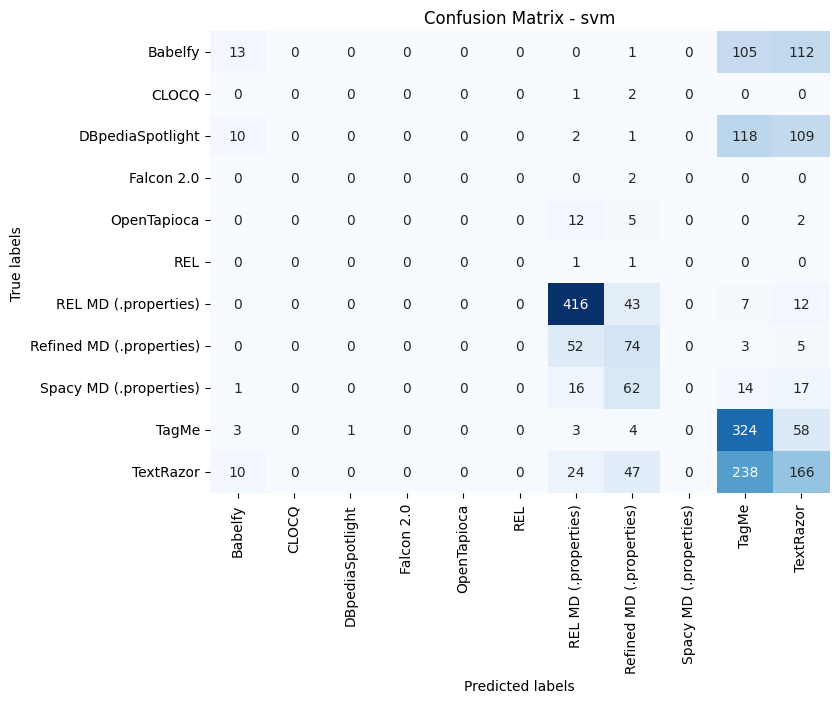

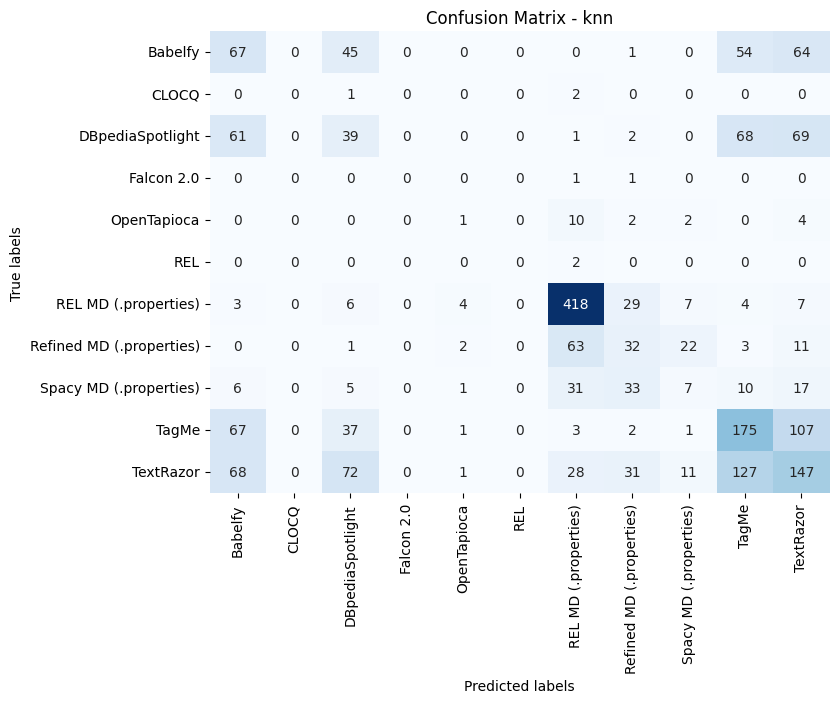

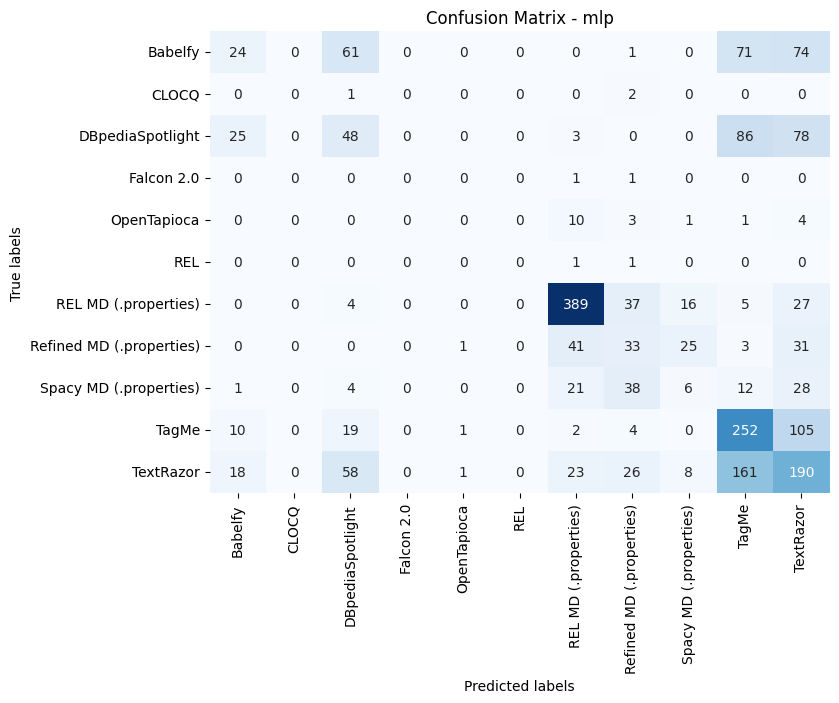

----------------- evaluate: combined topic word emb ---------------------
Training random_forest...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Training svm...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Training knn...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Training mlp...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/local/users/unjde/anal

random_forest accuracy: 0.44635193133047213, f1 score: 0.40757645606435483, recall: 0.44635193133047213
svm accuracy: 0.4568431092036242, f1 score: 0.42192905716102763, recall: 0.4568431092036242
knn accuracy: 0.42250834525512637, f1 score: 0.40665953960912876, recall: 0.42250834525512637
mlp accuracy: 0.44253695755841677, f1 score: 0.4263341810353585, recall: 0.44253695755841677


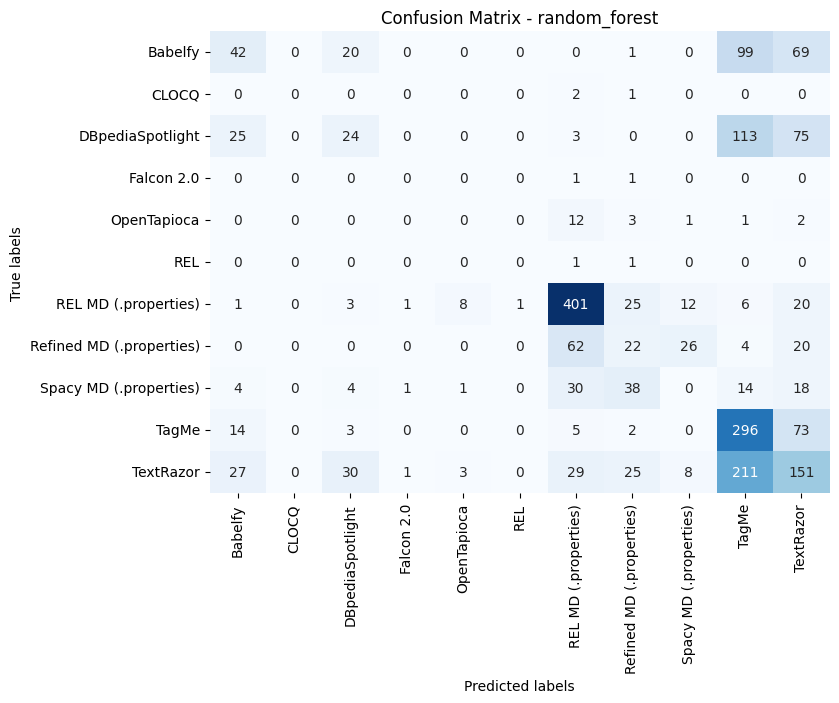

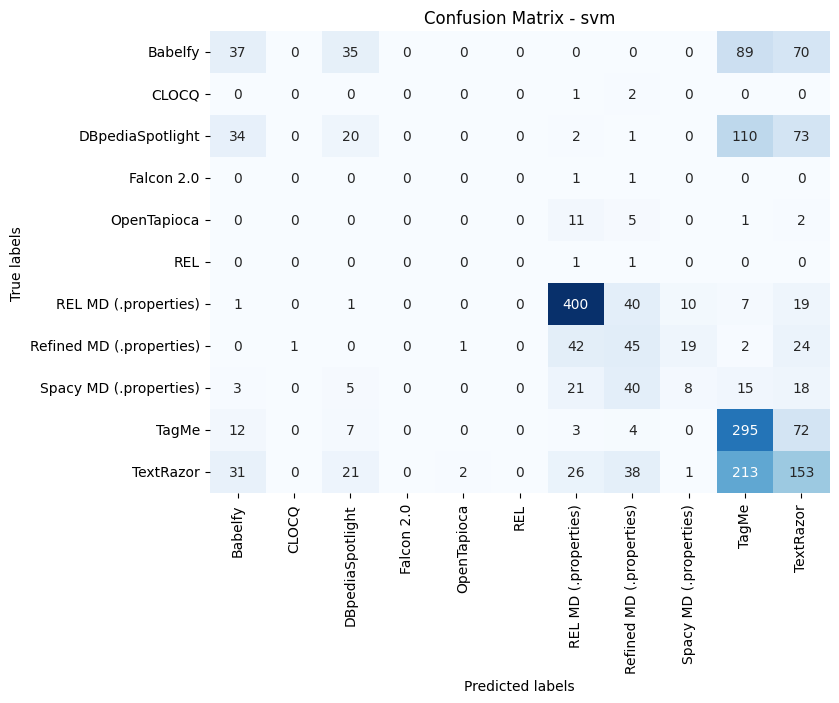

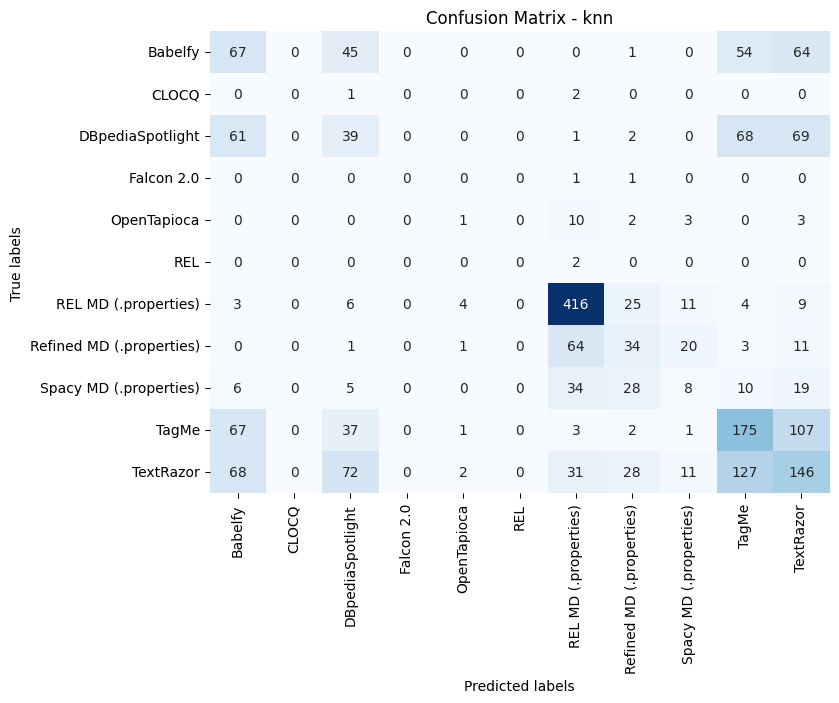

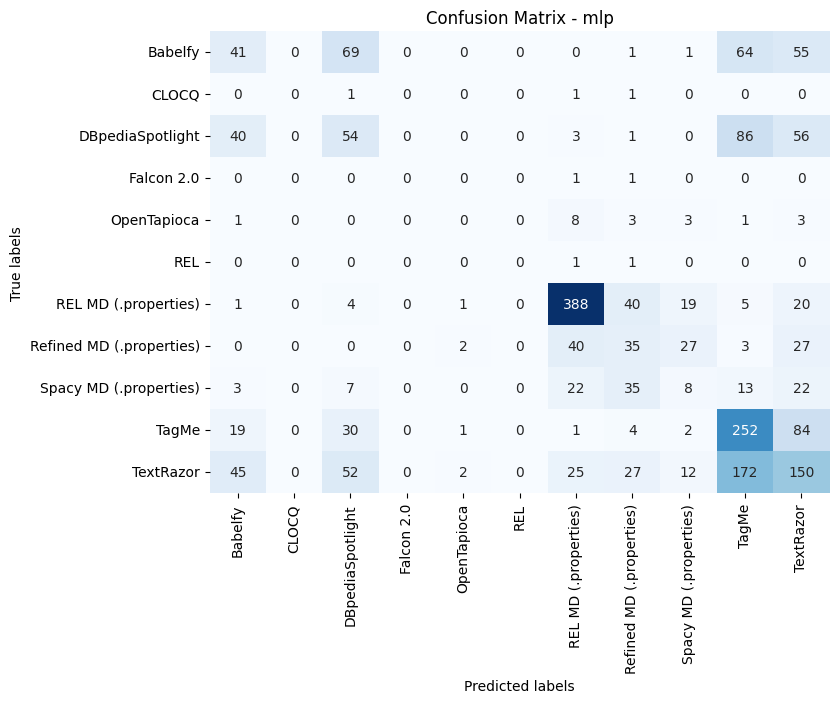

In [29]:

print("----------------- evaluate: combined one one encoding (noisy) ---------------------")
evaluate(X_combined_one_hot, y)
print("----------------- evaluate: combined topic word emb ---------------------")
evaluate(X_combined_top_word_emb, y)

In [5]:
print(X_test)

[[ 4.67922032e-01 -7.23301694e-02 -1.87379479e-01 ...  1.32175693e-02
  -1.98306248e-01  4.10286933e-02]
 [ 5.42179227e-01 -1.59196258e-01 -2.05425128e-01 ...  1.53887138e-01
   1.82935610e-01  1.72430791e-05]
 [ 4.42801952e-01 -1.70603693e-02 -1.35964956e-02 ...  1.66976109e-01
   1.24292396e-01 -2.90355855e-03]
 ...
 [ 5.11462569e-01 -2.23809794e-01 -1.56352609e-01 ...  9.57390293e-02
  -2.98196897e-02 -1.16017535e-01]
 [ 4.48782325e-01 -1.61099970e-01 -5.01496077e-01 ...  4.52655137e-01
   4.49955910e-01 -5.39556630e-02]
 [-3.31153721e-02 -2.65408456e-01 -7.14446604e-02 ...  7.33847497e-03
  -4.78629023e-02  3.95062827e-02]]


In [30]:
def get_text_and_ds_by_hash(hash: str):
    for raw_f in raw_text_labels_files:
        ds, raw_f = raw_f.values()
        for text_hash, doc_info in raw_f.items():
            if text_hash == hash:
                return doc_info, ds

In [32]:
!pip install rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 26.9 MB/s eta 0:00:00


In [33]:
from metric_calculator import MetricCalculator
from nif_loader import NifLoader
from json_loader import JsonLoader
from helpers import hashStringSha256

In [34]:
mc = MetricCalculator()


In [36]:
base_path = '/work/combining-linking-techniques/clit_backend/.clit_root/default/resources/data/experiment_results/MDOnly/'

sample_id, classes = text_labels[2438]
embedding = embeddings[sample_id]
doc_info, ds = get_text_and_ds_by_hash(sample_id)
print(f'The sample hash/id: {sample_id}')
#print(f'This id corresponds to : {doc_info['doc']}')

The sample hash/id: 6b6f6a6625a1cc07af9b713c1594ed7f48424e3b3817707f2cebb6610df3f986


In [37]:

# predict
prediction = trainer.predict([embedding])
classes_pred_by_name = list([class_names[v][0] for _, v in prediction.items()])[0]
print(f'Our models predicted: {classes_pred_by_name}')
# truth
print(f'True class is: {classes[0]}')


NameError: name 'trainer' is not defined

In [11]:

# following a wrong class
wrong_json_path = constants.HOME + base_path + ds.split('/')[-2].replace('.json', '') + f'/REL MD (.properties)/{sample_id}.json'
wrong_systems_mentions = mc.getSystemMentions(wrong_json_path)
print(f'Following a wrong class, we get the following mentions: {wrong_systems_mentions}')



Following a wrong class, we get the following mentions: {'127_DM', '641_MRI', '1806_MRI', '865_MRI', '2141_MRI', '2247_MRI', '2301_MRI', '1042_MRI', '1530_A1c', '1762_MRI', '1252_Staten Island University Hospital', '2556_MRI', '1500_DM'}


In [12]:
# following preds
pred_json_path = constants.HOME + base_path + ds.split('/')[-2].replace('.json', '') + f'/{classes_pred_by_name}/{sample_id}.json'
predicted_systems_mentions = mc.getSystemMentions(pred_json_path)
print(f'Following our models suggestions, we get the following mentions: {predicted_systems_mentions}')




Following our models suggestions, we get the following mentions: {'2385_diabetic', '2385_diabetic foot', '1380_hallux', '756_hypothesis', '1203_retrospective cohort', '746_foot', '1252_Staten Island University Hospital', '2471_mortality rate', '377_risk', '1930_cardiovascular disease', '2301_MRI', '1638_radiographic', '1388_amputation', '1831_amputation', '666_amputation', '252_risk', '1945_disease', '204_peripheral neuropathy', '622_resonance', '1923_HbA1c', '2048_statistical analysis', '1954_hypoalbuminemia', '26_magnetic resonance imaging', '2351_incidence', '1912_ethnicity', '1104_amputations', '1595_first metatarsal', '1339_2013', '1519_hemoglobin', '1519_hemoglobin A1c', '2424_statistically significant', '1330_2008', '1143_institutional review board', '1252_Staten Island University', '1904_gender', '2247_MRI', '439_diabetic', '737_diabetic foot', '2556_MRI', '351_ulcers', '1434_amputation', '1407_413', '865_MRI', '2141_MRI', '252_risk factor', '1806_MRI', '439_diabetic foot', '10

In [13]:
# following true class
true_json_path = constants.HOME + base_path + ds.split('/')[-2].replace('.json', '') + f'/{classes[0]}/{sample_id}.json'
true_systems_mentions = mc.getSystemMentions(true_json_path)
print(f'Following our true class, we get the following mentions: {true_systems_mentions}')



Following our true class, we get the following mentions: {'45_imaging', '2166_rate', '1990_index', '2385_diabetic', '2385_diabetic foot', '1380_hallux', '756_hypothesis', '1203_retrospective', '1203_retrospective cohort', '179_structures', '746_foot', '1980_body mass', '215_neuropathy', '1252_Staten Island University Hospital', '1375_toe', '2471_mortality rate', '194_resultant', '377_risk', '1930_cardiovascular disease', '1508_documented', '326_results', '372_high', '2471_mortality', '2301_MRI', '426_present', '1053_presurgical', '2196_statistical association', '1638_radiographic', '1710_reamputation', '1127_approval', '1388_amputation', '2088_significant', '844_obtaining', '2241_early', '2295_early', '892_planning', '1628_available', '1831_amputation', '108_Diabetes', '666_amputation', '2100_association', '252_risk', '1945_disease', '1669_analysis', '453_complications', '204_peripheral neuropathy', '622_resonance', '780_rate', '1014_patients', '1361_initial', '2033_results', '1923_HbA

In [14]:
# base truth
jl = JsonLoader(ds)
true_metions = list(jl.getDocumentsMentionsPairs().values())
for true_mention in true_metions:
    if hashStringSha256(true_mention['doc']) == sample_id:
        true_mentions = set(true_mention['mentions'])
    
    
print(f'True mentions (from nif): {true_mentions}')



True mentions (from nif): {'1499_DM', '2449_association', '1979_body mass index', '1970_smoking', '1052_presurgical', '755_hypothesis', '2254_decreased', '1564_initial', '1202_retrospective cohort analysis', '452_complications', '787_reamputation', '2132_initial', '126_DM', '1041_MRI', '1368_great toe (hallux) amputation', '2568_initial', '2576_amputation', '1911_ethnicity', '1753_initial', '2207_association', '843_obtaining', '1077_prior', '1239_patients', '2246_MRI', '509_during', '26_magnetic resonance imaging', '1094_forefoot amputations', '879_presurgical', '1650_data', '164_neurovascular structures', '251_risk factor', '1488_history', '2000_prior', '1612_amputation', '2264_mortality rates', '2470_mortality rate', '203_peripheral neuropathy', '371_high risk', '864_MRI', '1004_diabetic', '549_purpose', '2227_obtaining', '604_initial', '1690_incidence rates', '245_major', '565_study', '996_rate', '1174_study design', '612_magnetic resonance imaging', '1709_reamputation', '1761_MRI',

In [18]:
print(f'f1 between pred and true class: {mc.calculate_f1(predicted_systems_mentions, true_systems_mentions)}')
print(f'f1 between a wrong and true class: {mc.calculate_f1(wrong_systems_mentions, true_systems_mentions)}')
print(f'f1 between pred class predictions and ground truth: {mc.calculate_f1(predicted_systems_mentions, true_mentions)}')
print(f'f1 between true class predictions and ground truth: {mc.calculate_f1(true_systems_mentions, true_mentions)}')

Intersection (TP): {'2385_diabetic', '2385_diabetic foot', '1380_hallux', '756_hypothesis', '1203_retrospective cohort', '746_foot', '1252_Staten Island University Hospital', '2471_mortality rate', '377_risk', '1930_cardiovascular disease', '2301_MRI', '1638_radiographic', '1388_amputation', '1831_amputation', '666_amputation', '252_risk', '1945_disease', '204_peripheral neuropathy', '622_resonance', '1923_HbA1c', '2048_statistical analysis', '1954_hypoalbuminemia', '26_magnetic resonance imaging', '2351_incidence', '1912_ethnicity', '1104_amputations', '1519_hemoglobin', '1519_hemoglobin A1c', '1143_institutional review board', '1904_gender', '2247_MRI', '439_diabetic', '737_diabetic foot', '2556_MRI', '351_ulcers', '1434_amputation', '865_MRI', '2141_MRI', '252_risk factor', '1806_MRI', '439_diabetic foot', '101_foot', '2394_foot', '1657_Statistical analysis', '1584_hallux', '92_diabetic foot', '337_diabetic', '2577_amputation', '337_diabetic foot', '274_amputation', '321_foot', '35_

In [ ]:
#bert topic 
#dummy classifier
#PCA
#reduce number of classes
#RF topic id + emb